In [45]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

## 데이터 셋을 라이브러리에서 가져올 예정, 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist                     # MNIST 데이터셋
from tensorflow.keras.utils import to_categorical               # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt                            # 학습과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가 

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', # 흑백 사진으로 ..???????? 칼라는 RGB값..3개...??????
                  delimiter=',', 
                  skiprows=1) 
data.shape

(100, 785)

In [4]:
print('타겟 :',data[0,0])
# print('이미지(28*28을 1차원으로) :',data[0,1:].reshape(28,28)) # 2차원 데이터

# mnist는 1차원 백터라서 reshape을 써야함. 원래 이미지가 28*28이라서 한줄짜리를 28*28로 만듬
# (2차원으로 변경)

타겟 : 5.0


In [5]:
for row in data[0,1:].reshape(28,28): # data.reshape을 통해 2차원데이터이고 row는 1차원 배열
    for pixel in row:                 # 1차원 픽셀을 출력하기 위해 for문을 돌림
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [6]:
# import matplotlib.pyplot as plt
# print(data[0,0])
# img= data[0, 1:].reshape(28,28)
# plt.imshow(img)

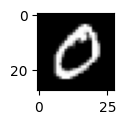

In [7]:
plt.figure(figsize=(1,1))
plt.imshow(data[1,1:].reshape(28,28), cmap='gray')

In [8]:
# %pip install opencv-contrib-python

In [9]:
# %pip show opencv-contrib-python

In [10]:
# %pip install opencv-python

In [8]:
# 칼라 사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('C:/ai_x/sample.jpg', 
                        cv2.IMREAD_GRAYSCALE  # 흑백포맷으로 읽기 
                       )
print(image_gray.shape)
print(type(image_gray))

(183, 275)
<class 'numpy.ndarray'>


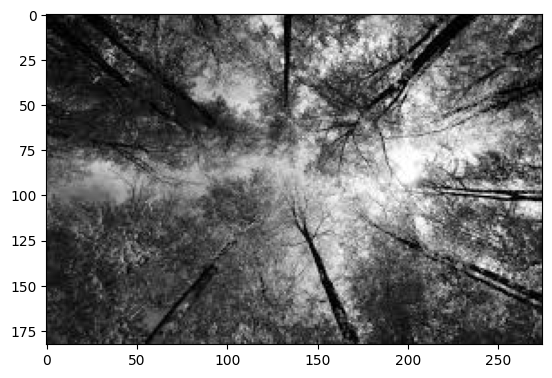

In [9]:
plt.imshow(image_gray, cmap='gray')

# 1.데이터 생성 및 전처리

In [10]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape,y_test.shape # 2차원 넘파이 배열로 자동으로 받음
# 28*28 이미지가 6만개... X_train 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
for row in X_train[0]:
    for pixcel in row:
        print('{:3.0f}'.format(pixcel), end='')
    print(pixcel)

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  00
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  00
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  00
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  00
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0

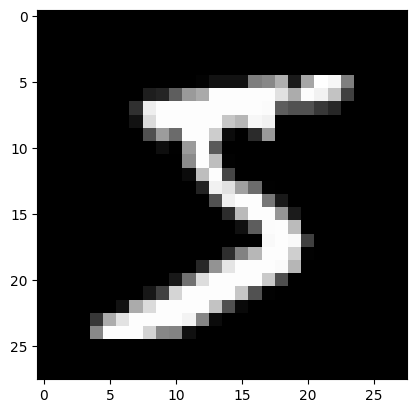

In [12]:
plt.imshow(X_train[0], cmap='gray')

In [13]:
# 학습셋(6만개) -> 훈련셋(5만개) + 검증셋(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# X_train 을 먼저하면 val을 못 하기에 val을 먼저하고 train을 재정의

In [14]:
# 학습셋(5만개:fit용), 검증셋(1만개:fit용), 테스트셋(1만개:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [15]:
# 입력 변수(독립 변수) (n, 28, 28) -> (n, 784) -> 실수형 변환 -> 스케일조정(255.0으로 나누기 = 0~1사이로 나누기)
# 종속변수는 원핫인코딩으로 0과 1이 나타나므로 전체 데이터를 0~1로 스케일 조정함
# 학습하려면 실수형으로 만들어야 함
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
# reshape(50000,-1)을 하면 알아서 50000,784가 됨 28*28=748 / -1은 알아서 한줄로 만드는것 
# train_X.shape # (50000,784)
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0
# train_X[0]
# val_X[0]
# test_X[0]
train_X.shape, val_X.shape,test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [16]:
np.random.choice(45,6) #0~44까지 6자리 숫자를 뽑아줌

array([23, 29,  4, 40, 12, 36])

In [17]:
# 훈련셋 재설정 (5만개->500개) / 검증셋 재설정(1만개->300개), 학습시간을 절약하기 위해 재설정. accuracy도 줄어듬
# 테스트셋
train_idx = np.random.choice(50000,700)
val_idx  = np.random.choice(10000,300)
train_X = train_X[train_idx] # 700개의 행을 추출 (여러인덱스를 한번에?)
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape
# 타겟변수                      # 입력변수

((700, 784), (700,), (300, 784), (300,))

In [18]:
train_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# 데이터 처리 전 작업 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0
train_idx = np.random.choice(50000,700)
val_idx  = np.random.choice(10000,300)
train_X = train_X[train_idx] # 700개의 행을 추출 (여러인덱스를 한번에?)
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

train_X.shape, train_Y.shape,val_X.shape,val_Y.shape, test_X.shape,test_Y.shape
# y_train.shape, , y_val.shape
# train_X 입력변수(학습용데이터)
# y_train 타겟변수(학습용데이터)
# val_X   입력변수(검증용데이터)
# y_val   타겟변수(검증용데이터)


((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

In [20]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])
print(y_val[:2])
print(val_Y[:2])
print(y_test[:2])
print(test_Y[:2])
train_Y.shape, val_Y.shape,test_Y.shape

[8 3]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3 4]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[7 2]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


((700, 10), (300, 10), (10000, 10))

# 2. 모델 구성

In [21]:
# 784 -> 2 -> 10
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [22]:
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
# y를 원핫인코딩 했으면 categorical_crossentropy / spare_categorical_crossentropy은 내부적으로 원핫인코딩을 대신해줌(대신 데이터를 숫자로 만들어야 함)
# 자연어 처리할 때는 SGD도 좋음 

# 4.모델 학습

In [23]:
%%time
hist = model.fit(train_X,train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X,val_Y)) # 학습 도중 성능 val_X,val_Y로 평가 

Epoch 1/500
7/7 [==============================] - 1s 35ms/step - loss: 2.2941 - accuracy: 0.1286 - val_loss: 2.2398 - val_accuracy: 0.1667
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2234 - accuracy: 0.1486 - val_loss: 2.1909 - val_accuracy: 0.1800
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 2.1730 - accuracy: 0.1586 - val_loss: 2.1331 - val_accuracy: 0.2100
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 2.1262 - accuracy: 0.1486 - val_loss: 2.0916 - val_accuracy: 0.1967
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.0913 - accuracy: 0.1571 - val_loss: 2.0558 - val_accuracy: 0.1967
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 2.0589 - accuracy: 0.1643 - val_loss: 2.0269 - val_accuracy: 0.2100
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 2.0304 - accuracy: 0.1800 - val_loss: 2.0001 - val_accuracy: 0.2133
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 1.2963 - accuracy: 0.5229 - val_loss: 1.4015 - val_accuracy: 0.5167
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2932 - accuracy: 0.5271 - val_loss: 1.4000 - val_accuracy: 0.5033
Epoch 119/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2914 - accuracy: 0.5186 - val_loss: 1.3988 - val_accuracy: 0.5000
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2877 - accuracy: 0.5229 - val_loss: 1.3967 - val_accuracy: 0.5067
Epoch 121/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2852 - accuracy: 0.5271 - val_loss: 1.3955 - val_accuracy: 0.5033
Epoch 122/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2825 - accuracy: 0.5271 - val_loss: 1.3936 - val_accuracy: 0.5033
Epoch 123/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2797 - accuracy: 0.5300 - val_loss: 1.3924 - val_accuracy: 0.5033
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0529 - accuracy: 0.6386 - val_loss: 1.3205 - val_accuracy: 0.5100
Epoch 234/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0512 - accuracy: 0.6357 - val_loss: 1.3191 - val_accuracy: 0.5167
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0497 - accuracy: 0.6329 - val_loss: 1.3200 - val_accuracy: 0.5100
Epoch 236/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0484 - accuracy: 0.6386 - val_loss: 1.3200 - val_accuracy: 0.5100
Epoch 237/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0466 - accuracy: 0.6386 - val_loss: 1.3192 - val_accuracy: 0.5133
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0449 - accuracy: 0.6357 - val_loss: 1.3178 - val_accuracy: 0.5133
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0437 - accuracy: 0.6357 - val_loss: 1.3192 - val_accuracy: 0.5067
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.9061 - accuracy: 0.6657 - val_loss: 1.3291 - val_accuracy: 0.5233
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9049 - accuracy: 0.6686 - val_loss: 1.3306 - val_accuracy: 0.5200
Epoch 351/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9044 - accuracy: 0.6686 - val_loss: 1.3310 - val_accuracy: 0.5167
Epoch 352/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9032 - accuracy: 0.6714 - val_loss: 1.3291 - val_accuracy: 0.5233
Epoch 353/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9017 - accuracy: 0.6700 - val_loss: 1.3308 - val_accuracy: 0.5200
Epoch 354/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9015 - accuracy: 0.6700 - val_loss: 1.3326 - val_accuracy: 0.5167
Epoch 355/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8996 - accuracy: 0.6729 - val_loss: 1.3315 - val_accuracy: 0.5200
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.7868 - accuracy: 0.7500 - val_loss: 1.3552 - val_accuracy: 0.5667
Epoch 466/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7860 - accuracy: 0.7500 - val_loss: 1.3561 - val_accuracy: 0.5700
Epoch 467/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7850 - accuracy: 0.7514 - val_loss: 1.3560 - val_accuracy: 0.5767
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7839 - accuracy: 0.7514 - val_loss: 1.3578 - val_accuracy: 0.5700
Epoch 469/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7830 - accuracy: 0.7543 - val_loss: 1.3554 - val_accuracy: 0.5633
Epoch 470/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7821 - accuracy: 0.7543 - val_loss: 1.3567 - val_accuracy: 0.5600
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7812 - accuracy: 0.7543 - val_loss: 1.3571 - val_accuracy: 0.5700
Epoch 472/500
7/7 [========

In [24]:
# 학습과정 살펴보기 
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

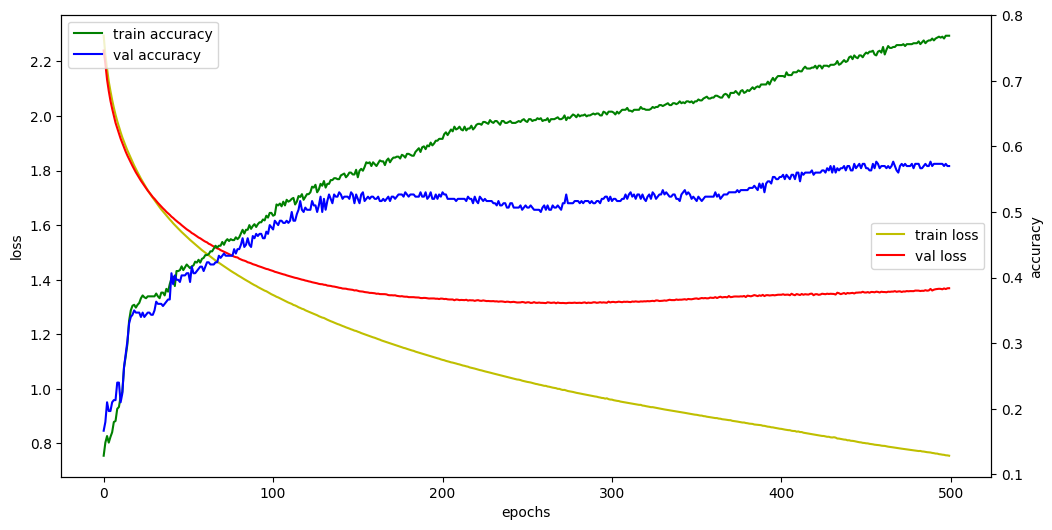

In [25]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [26]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 - 0s - loss: 1.4559 - accuracy: 0.5310 - 123ms/epoch - 1ms/step
loss : 1.4559285640716553
accuracy : 0.531000018119812


# ※ 위 모델(DNN)의 accuracy 늘리기 (85% 목표)
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data 추가, dropout, 활성화 함수 : relu계열, tanh)
- epoch 조정
- optimizer 변경 (*미비한 변화)

Epoch 1/40
10/10 [==============================] - 1s 33ms/step - loss: 1.5681 - accuracy: 0.5280 - val_loss: 0.6838 - val_accuracy: 0.8400
Epoch 2/40
10/10 [==============================] - 0s 17ms/step - loss: 0.6053 - accuracy: 0.8130 - val_loss: 0.4104 - val_accuracy: 0.8780
Epoch 3/40
10/10 [==============================] - 0s 17ms/step - loss: 0.3325 - accuracy: 0.9090 - val_loss: 0.3271 - val_accuracy: 0.9100
Epoch 4/40
10/10 [==============================] - 0s 17ms/step - loss: 0.2040 - accuracy: 0.9380 - val_loss: 0.3480 - val_accuracy: 0.9080
Epoch 5/40
10/10 [==============================] - 0s 17ms/step - loss: 0.1335 - accuracy: 0.9690 - val_loss: 0.3008 - val_accuracy: 0.9140
Epoch 6/40
10/10 [==============================] - 0s 16ms/step - loss: 0.1039 - accuracy: 0.9760 - val_loss: 0.2955 - val_accuracy: 0.9160
Epoch 7/40
10/10 [==============================] - 0s 16ms/step - loss: 0.0630 - accuracy: 0.9880 - val_loss: 0.3088 - val_accuracy: 0.9180
Epoch 8/40
10

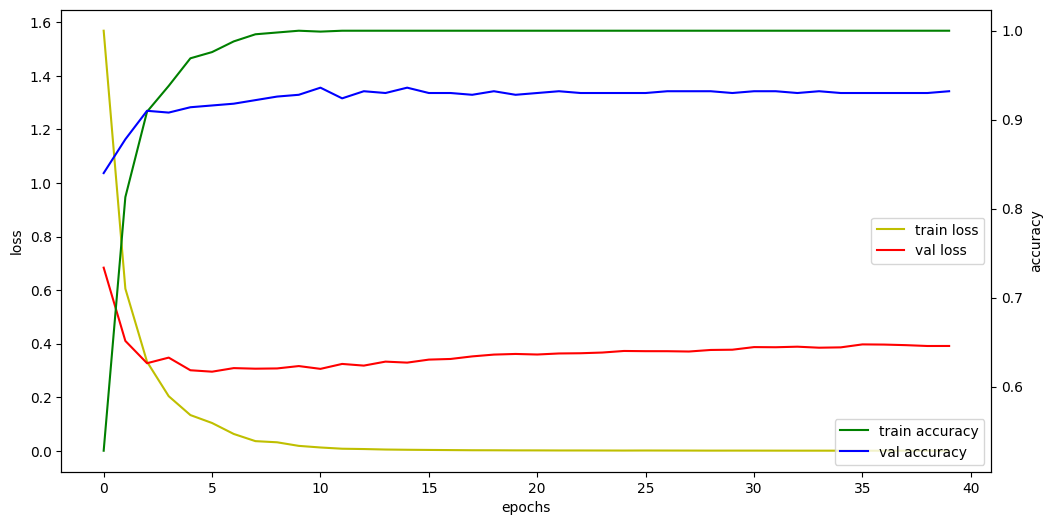

CPU times: total: 30.3 s
Wall time: 7.92 s


In [55]:
%%time
# 데이터 처리 전 작업 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0
# 50,000개 -> 700개 , 10,000개 -> 300개 
train_idx = np.random.choice(50000,1000)
val_idx  = np.random.choice(10000,500)
train_X = train_X[train_idx] # 700개의 행을 추출 (여러인덱스를 한번에?)
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속)변수 
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape,val_X.shape,val_Y.shape, test_X.shape,test_Y.shape
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
hist = model.fit(train_X,train_Y,
                 epochs=40,
                 batch_size=100,
                 validation_data=(val_X,val_Y)) # 학습 도중 성능 val_X,val_Y로 평가 
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 최종 loss,accuracy값 체크 
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [56]:
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 - 0s - loss: 0.3984 - accuracy: 0.9146 - 423ms/epoch - 4ms/step
loss : 0.3984132707118988
accuracy : 0.9146000146865845


Epoch 1/40
500/500 [==============================] - 7s 13ms/step - loss: 0.2349 - accuracy: 0.9289 - val_loss: 0.1090 - val_accuracy: 0.9674
Epoch 2/40
500/500 [==============================] - 6s 12ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.0841 - val_accuracy: 0.9724
Epoch 3/40
500/500 [==============================] - 6s 12ms/step - loss: 0.0665 - accuracy: 0.9784 - val_loss: 0.0907 - val_accuracy: 0.9724
Epoch 4/40
500/500 [==============================] - 6s 13ms/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 5/40
500/500 [==============================] - 6s 12ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 6/40
500/500 [==============================] - 6s 12ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0855 - val_accuracy: 0.9775
Epoch 7/40
500/500 [==============================] - 6s 13ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0808 - val_accuracy: 0.9794

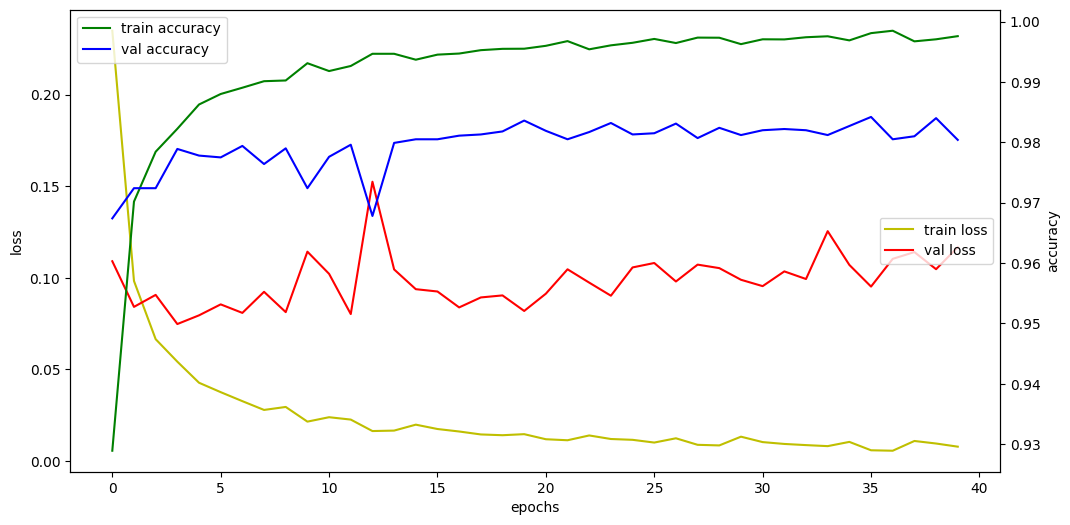

100/100 - 0s - loss: 0.1007 - accuracy: 0.9819 - 461ms/epoch - 5ms/step
loss : 0.10068196803331375
accuracy : 0.9818999767303467
CPU times: total: 21min 17s
Wall time: 4min 47s


In [57]:
%%time
# 데이터 처리 전 작업 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0
# 50,000개 -> 700개 , 10,000개 -> 300개 
# train_idx = np.random.choice(50000,1000)
# val_idx  = np.random.choice(10000,500)
# train_X = train_X[train_idx] # 700개의 행을 추출 (여러인덱스를 한번에?)
# y_train = y_train[train_idx]
# val_X = val_X[val_idx]
# y_val = y_val[val_idx]
# 타겟(종속)변수 
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape,val_X.shape,val_Y.shape, test_X.shape,test_Y.shape
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
hist = model.fit(train_X,train_Y,
                 epochs=40,
                 batch_size=100,
                 validation_data=(val_X,val_Y)) # 학습 도중 성능 val_X,val_Y로 평가 
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 최종 loss,accuracy값 체크 
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [58]:
# 최종 loss,accuracy값 체크 
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 - 0s - loss: 0.1007 - accuracy: 0.9819 - 432ms/epoch - 4ms/step
loss : 0.10068196803331375
accuracy : 0.9818999767303467


Epoch 1/60
500/500 [==============================] - 10s 19ms/step - loss: 0.3021 - accuracy: 0.9103 - val_loss: 0.1603 - val_accuracy: 0.9541
Epoch 2/60
500/500 [==============================] - 10s 20ms/step - loss: 0.1706 - accuracy: 0.9485 - val_loss: 0.1266 - val_accuracy: 0.9619
Epoch 3/60
500/500 [==============================] - 9s 18ms/step - loss: 0.1361 - accuracy: 0.9592 - val_loss: 0.1120 - val_accuracy: 0.9673
Epoch 4/60
500/500 [==============================] - 9s 18ms/step - loss: 0.1142 - accuracy: 0.9654 - val_loss: 0.1200 - val_accuracy: 0.9648
Epoch 5/60
500/500 [==============================] - 9s 18ms/step - loss: 0.1026 - accuracy: 0.9684 - val_loss: 0.0976 - val_accuracy: 0.9733
Epoch 6/60
500/500 [==============================] - 9s 19ms/step - loss: 0.0890 - accuracy: 0.9720 - val_loss: 0.1062 - val_accuracy: 0.9689
Epoch 7/60
500/500 [==============================] - 9s 19ms/step - loss: 0.0830 - accuracy: 0.9738 - val_loss: 0.0987 - val_accuracy: 0.97

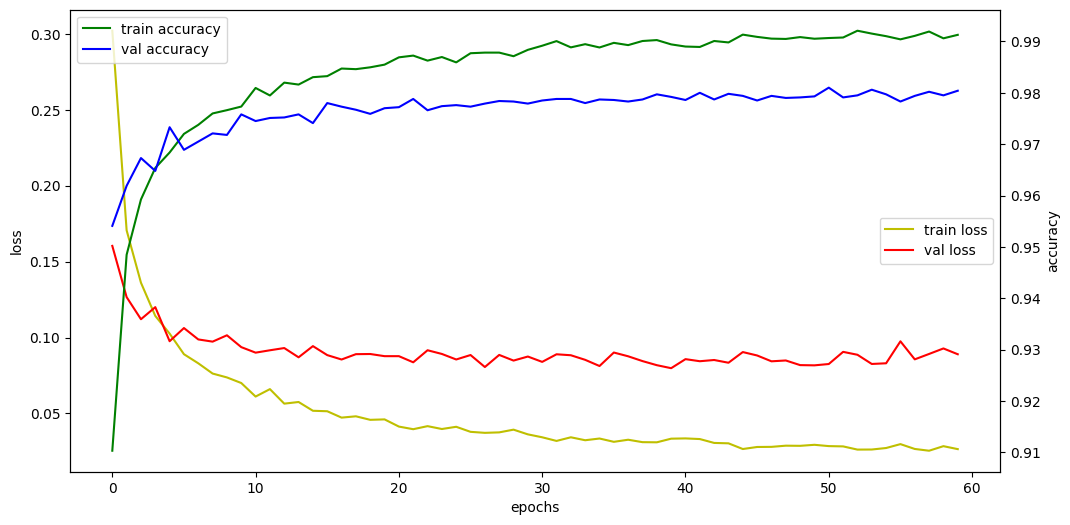

100/100 - 1s - loss: 0.0848 - accuracy: 0.9809 - 575ms/epoch - 6ms/step
loss : 0.08477692306041718
accuracy : 0.98089998960495
CPU times: total: 53min 5s
Wall time: 10min 6s


In [59]:
%%time
# 데이터 처리 전 작업 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0

# 타겟(종속)변수 
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape,val_X.shape,val_Y.shape, test_X.shape,test_Y.shape
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=648, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
hist = model.fit(train_X,train_Y,
                 epochs=60,
                 batch_size=100,
                 validation_data=(val_X,val_Y)) # 학습 도중 성능 val_X,val_Y로 평가 
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 최종 loss,accuracy값 체크 
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [61]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [65]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
# 크로스탭(crosstab)과 컨퓨전 매트릭스(confusion matrix)
# 크로스탭: 두 범주형 변수 간의 빈도수를 교차표 형태로 보여줌
# 컨퓨전 매트릭스 : 분류 모델이 얼마나 잘 맞췄는지 보여주는 행렬 (이진분류, 다중분류의 성능평가에 주로 씀)
pd.crosstab(y_test,yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,1,0,0,0,1,1,3,0
1,0,1127,1,2,0,1,1,1,2,0
2,1,1,1018,2,1,0,1,3,5,0
3,0,0,5,994,0,0,0,5,5,1
4,1,1,5,1,962,0,3,1,0,8
5,3,1,0,10,1,861,6,0,7,3
6,5,3,1,0,2,5,937,0,4,1
7,2,4,8,3,0,0,0,1003,1,7
8,1,0,3,2,1,2,1,3,961,0


In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,yhat)

array([[ 973,    1,    1,    0,    0,    0,    1,    1,    3,    0],
       [   0, 1127,    1,    2,    0,    1,    1,    1,    2,    0],
       [   1,    1, 1018,    2,    1,    0,    1,    3,    5,    0],
       [   0,    0,    5,  994,    0,    0,    0,    5,    5,    1],
       [   1,    1,    5,    1,  962,    0,    3,    1,    0,    8],
       [   3,    1,    0,   10,    1,  861,    6,    0,    7,    3],
       [   5,    3,    1,    0,    2,    5,  937,    0,    4,    1],
       [   2,    4,    8,    3,    0,    0,    0, 1003,    1,    7],
       [   1,    0,    3,    2,    1,    2,    1,    3,  961,    0],
       [   2,    3,    0,    6,    7,    6,    0,    4,    8,  973]],
      dtype=int64)

In [70]:
# 틀린 갯수 :
# 테스트 데이터셋이 10000개 이기에 10000-로 설정함
10000-10000*loss_and_metrics[1]
# 전체 - 전체*정확도 = 틀린갯수 
# 정확도 = 맞춘갯수 / 전체갯수

191.0001039505005

In [71]:
cnt = 0
for y,h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 191


In [72]:
model.save('model/08_mnist.h5')

# ※ 콜백함수1 : 로그 출력

In [29]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
# 에포크가 끝날때마다 로그 출력, 모델 저장, 학습중단 
# 검증 성능이 더이상 좋아지지않으면 자동으로 학습 중단 (과적합 방지)
# 학습중 가장 좋은 성능 모델 저장 (중단되더라도 가장 좋은 모델 복원할 수 있게)

In [46]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한 
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# 클래스 만들기 
class CustomHistory(Callback):
    def __init__(self):     # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}): # 학습1 epoch마다 자동 실행되는 함수
        self.epoch += 1                     # epoch마다 self.epoch값을 1씩 증가(내가 카운팅 , 이유 : n번째마다 카운팅하려고)    
        if self.epoch%10 ==0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(
                                                                        self.epoch,
                                                                        logs.get('loss','-'),
                                                                        logs.get('accuracy','-'),
                                                                        logs.get('val_loss','-'),
                                                                        logs.get('val_accuracy','-')))
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,-1).astype('float32')/255.0 
val_X = X_val.reshape(10000,-1).astype('float32')/255.0
test_X = X_test.reshape(10000,-1).astype('float32')/255.0
# 50,000개 -> 700개 , 10,000개 -> 300개 
train_idx = np.random.choice(50000,1000)
val_idx  = np.random.choice(10000,500)
train_X = train_X[train_idx] # 700개의 행을 추출 (여러인덱스를 한번에?)
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속)변수 
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape,val_X.shape,val_Y.shape, test_X.shape,test_Y.shape
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=648, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
customHistory = CustomHistory()
hist = model.fit(train_X,train_Y,
                 epochs=50,
                 batch_size=100,
                 validation_data=(val_X,val_Y), # 학습 도중 성능 val_X,val_Y로 평가
                 verbose=0,
                callbacks=[customHistory])      # 콜백함수

epoch:10, loss:0.06789267808198929, acc:0.9929999709129333, val_loss:0.41297265887260437, val_acc:0.8679999709129333
epoch:20, loss:0.016464844346046448, acc:1.0, val_loss:0.44179826974868774, val_acc:0.8679999709129333
epoch:30, loss:0.005982523318380117, acc:1.0, val_loss:0.46482202410697937, val_acc:0.8700000047683716
epoch:40, loss:0.003386717289686203, acc:1.0, val_loss:0.49968957901000977, val_acc:0.8640000224113464
epoch:50, loss:0.002628248417750001, acc:1.0, val_loss:0.520208477973938, val_acc:0.8640000224113464
CPU times: total: 47.1 s
Wall time: 11.4 s


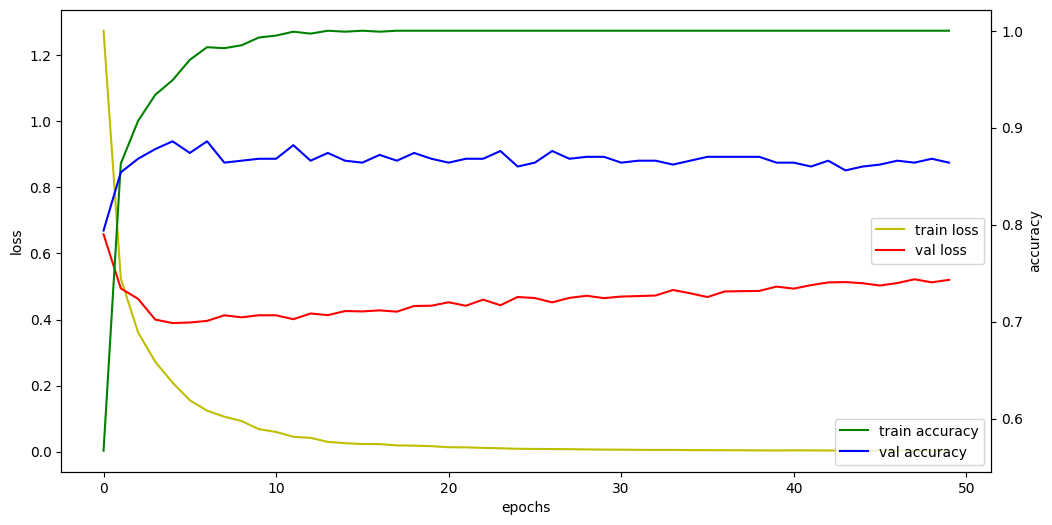

In [47]:

fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [32]:
# 최종 loss,accuracy값 체크 

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 - 1s - loss: 0.4543 - accuracy: 0.8950 - 561ms/epoch - 6ms/step
loss : 0.45428720116615295
accuracy : 0.8949999809265137


# ※콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [48]:
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=648, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
# moniter기분으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy',patience=2)     

hist = model.fit(train_X,train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X,val_Y), # 학습 도중 성능 val_X,val_Y로 평가
                 verbose=1,
                callbacks=[earlystopping])      # 콜백함수

Epoch 1/500
10/10 [==============================] - 1s 41ms/step - loss: 1.2319 - accuracy: 0.5900 - val_loss: 0.6341 - val_accuracy: 0.8180
Epoch 2/500
10/10 [==============================] - 0s 25ms/step - loss: 0.5342 - accuracy: 0.8520 - val_loss: 0.4640 - val_accuracy: 0.8640
Epoch 3/500
10/10 [==============================] - 0s 26ms/step - loss: 0.3626 - accuracy: 0.9020 - val_loss: 0.4292 - val_accuracy: 0.8720
Epoch 4/500
10/10 [==============================] - 0s 24ms/step - loss: 0.2595 - accuracy: 0.9380 - val_loss: 0.3933 - val_accuracy: 0.8800
Epoch 5/500
10/10 [==============================] - 0s 26ms/step - loss: 0.2160 - accuracy: 0.9460 - val_loss: 0.4024 - val_accuracy: 0.8740
Epoch 6/500
10/10 [==============================] - 0s 26ms/step - loss: 0.1652 - accuracy: 0.9670 - val_loss: 0.4326 - val_accuracy: 0.8460


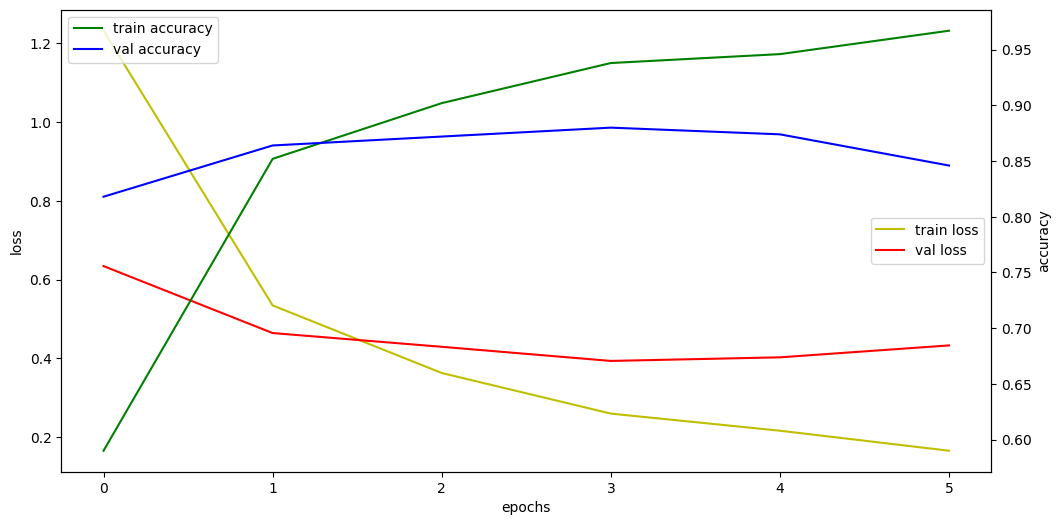

In [49]:

fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [40]:
# 최종 loss,accuracy값 체크 

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=2)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 - 1s - loss: 0.3577 - accuracy: 0.8960 - 543ms/epoch - 5ms/step
loss : 0.3577405512332916
accuracy : 0.8960000276565552


# ※ 콜백함수3 : ModelCheckpoint
- epoch마다 val_accuracy (val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [50]:
# 모델설정
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1286, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=648, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
#모델 학습과정 설정
model.compile(loss='categorical_crossentropy',  # spare_categorical_crossentropy (원핫인코딩 안 했을 때 사용)
              optimizer='adam',
              metrics=['accuracy'])
#모델 학습
# moniter기분으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy',patience=10)     
# 모델 자동 저장 콜백 추가
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder) :  # model_save_folder가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
    
checkpoint = ModelCheckpoint(filepath=file, # 저장 경로
                             monitor='val_accuracy', # 모니터할 지표
                             save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장(좋아질 때만 저장) 반대 - 좋은거 모두 저장 false 
                             mode='max',             # 값이 클수록 저장
                             verbose=1,              # 저장시 로구 출력
                            )

hist = model.fit(train_X,train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X,val_Y), # 학습 도중 성능 val_X,val_Y로 평가
                 verbose=1,
                callbacks=[checkpoint, earlystopping])      # 콜백함수

Epoch 1/500
10/10 [==============================] - ETA: 0s - loss: 1.1606 - accuracy: 0.6200
Epoch 1: val_accuracy improved from -inf to 0.83400, saving model to ./model08\mnist-001-val0.8340.h5
10/10 [==============================] - 1s 45ms/step - loss: 1.1606 - accuracy: 0.6200 - val_loss: 0.5986 - val_accuracy: 0.8340
Epoch 2/500
10/10 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.8560
Epoch 2: val_accuracy improved from 0.83400 to 0.87800, saving model to ./model08\mnist-002-val0.8780.h5
10/10 [==============================] - 0s 30ms/step - loss: 0.4769 - accuracy: 0.8560 - val_loss: 0.4441 - val_accuracy: 0.8780
Epoch 3/500
10/10 [==============================] - ETA: 0s - loss: 0.3260 - accuracy: 0.9150
Epoch 3: val_accuracy improved from 0.87800 to 0.88200, saving model to ./model08\mnist-003-val0.8820.h5
10/10 [==============================] - 0s 30ms/step - loss: 0.3260 - accuracy: 0.9150 - val_loss: 0.4166 - val_accuracy: 0.8820
Epoch 4/500
 

10/10 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.90000
10/10 [==============================] - 0s 24ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.8940


In [51]:
model.evaluate(val_X, val_Y)

16/16 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.8940


[0.4471605122089386, 0.8939999938011169]